In [1]:
import numpy as np
import os

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils import to_categorical
K.set_image_dim_ordering('th')
from sklearn.preprocessing import MinMaxScaler

C:\Users\Erin.Ford\anaconda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
cat = np.load('cat.npy')
penguin = np.load('penguin.npy')
ant = np.load('ant.npy')


# print number of images in dataset and numpy array size of each image
print ("no_of_pics, pixels_size")
print(cat.shape)
print(penguin.shape)
print(ant.shape)


no_of_pics, pixels_size
(123202, 784)
(253791, 784)
(124612, 784)


In [3]:
#Add a column to each one as an identifier
cat = np.c_[cat, np.zeros(len(cat))]
penguin = np.c_[penguin, np.ones(len(penguin))]
ant = np.c_[ant, 2*np.ones(len(ant))]

In [4]:
def plot_samples(input_array, rows=1, cols=5, title=''):
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

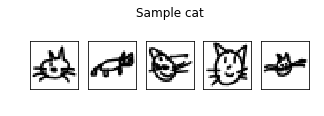

In [5]:
plot_samples(cat, title='Sample cat\n')

In [6]:
# merge the arrays, and split the features (X) and labels (y). Convert to float32 to save some memory.
X = np.concatenate((cat[:10000,:-1], penguin[:10000,:-1], ant[:10000,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((cat[:10000,-1], penguin[:10000,-1], ant[:10000,-1]), axis=0).astype('float32') # the last column

# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# Use a 50:50 split, training the models on 10'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)

In [7]:
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
num_classes = 3

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train[0]

array([1., 0., 0.], dtype=float32)

In [9]:
#create empty sequential model
model = Sequential()

In [10]:
#first hidden layer
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [11]:
#second hidden layer
model.add(Dense(100, activation='relu'))

In [12]:
#final output layer where number of nodes corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax'))

In [13]:
#compile the model
model.compile(loss="categorical_crossentropy",
             optimizer ="adam", metrics=["accuracy"])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 88,903
Trainable params: 88,903
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(
    X_train,
    y_train,
    epochs = 20,
    shuffle=True,
    verbose = 2
)

Epoch 1/20
 - 3s - loss: 0.4081 - acc: 0.8365
Epoch 2/20
 - 2s - loss: 0.2776 - acc: 0.8977
Epoch 3/20
 - 2s - loss: 0.2218 - acc: 0.9238
Epoch 4/20
 - 2s - loss: 0.1721 - acc: 0.9426
Epoch 5/20
 - 2s - loss: 0.1347 - acc: 0.9529
Epoch 6/20
 - 2s - loss: 0.1067 - acc: 0.9615
Epoch 7/20
 - 2s - loss: 0.0811 - acc: 0.9708
Epoch 8/20
 - 2s - loss: 0.0597 - acc: 0.9787
Epoch 9/20
 - 2s - loss: 0.0448 - acc: 0.9853
Epoch 10/20
 - 2s - loss: 0.0372 - acc: 0.9871
Epoch 11/20
 - 2s - loss: 0.0354 - acc: 0.9878
Epoch 12/20
 - 2s - loss: 0.0285 - acc: 0.9907
Epoch 13/20
 - 2s - loss: 0.0214 - acc: 0.9928
Epoch 14/20
 - 2s - loss: 0.0273 - acc: 0.9907
Epoch 15/20
 - 2s - loss: 0.0352 - acc: 0.9881
Epoch 16/20
 - 2s - loss: 0.0151 - acc: 0.9952
Epoch 17/20
 - 2s - loss: 0.0186 - acc: 0.9933
Epoch 18/20
 - 2s - loss: 0.0121 - acc: 0.9960
Epoch 19/20
 - 2s - loss: 0.0165 - acc: 0.9942
Epoch 20/20
 - 2s - loss: 0.0299 - acc: 0.9894


In [16]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.6755409747126202, Accuracy: 0.8987333333015441
